# Correlation and Regression Analysis
by Chris North, Virginia Tech

Univariate summaries; bivariate correlations; simple, poly, multi- linear regressions

Data files:  States2010.csv

In [1]:
###
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###
s = pandas.read_csv("data/States2010.csv")
s.shape

(51, 9)

## Univariate distribution analyses

* $mean(x) = \bar{x} = \mu(x) = \frac{1}{n}\sum x_i$
* $std(x) = \sigma(x) = RMSE(x, \bar{x}) = \sqrt{\frac{1}{n}\sum (x_i - \bar{x})^2}$
    * https://en.wikipedia.org/wiki/68–95–99.7_rule
* $var(x) = \sigma(x)^2$
* $zscore(x_i) = \frac{x_i-\bar{x}}{\sigma(x)}$


<AxesSubplot:>

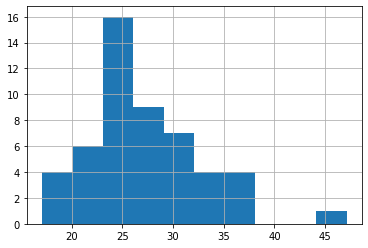

In [4]:
s.PercentCollegeGrad.hist()

<AxesSubplot:>

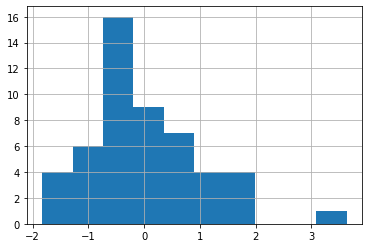

In [12]:
z.hist()

In [6]:
s.describe()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.053834e+06,5.518077e+06,37825.392157,27.154902,639.431373,23.341176,69253.047843
std,6.823984e+06,6.164026e+06,6659.690873,5.491787,169.291022,3.568035,85526.076023
min,5.636260e+05,4.937820e+05,28541.000000,17.100000,387.000000,16.000000,61.050000
25%,1.696962e+06,1.502608e+06,33447.000000,23.650000,502.000000,21.250000,33334.515000
50%,4.339367e+06,4.012012e+06,36272.000000,26.000000,589.000000,23.600000,53624.760000
75%,6.636084e+06,6.214791e+06,41058.500000,29.800000,766.000000,25.400000,80692.730000
max,3.725396e+07,3.387165e+07,62484.000000,47.100000,1106.000000,31.400000,570640.950000


In [11]:
z = (s.PercentCollegeGrad - s.PercentCollegeGrad.mean()) / s.PercentCollegeGrad.std()
z

0    -1.029702
1    -0.119251
2    -0.264923
3    -1.503136
4     0.463437
5     1.519560
6     1.446724
7     0.062839
8     3.631805
9    -0.283132
10   -0.009997
11    0.372392
12   -0.629103
13    0.481646
14   -0.956866
15   -0.538058
16    0.299556
17   -1.302837
18   -1.193583
19   -0.192087
20    1.464933
21    1.938367
22   -0.483431
23    0.736572
24   -1.466718
25   -0.465222
26   -0.028206
27   -0.009997
28   -1.029702
29    0.955080
30    1.264634
31   -0.374177
32    0.845826
33   -0.246714
34   -0.283132
35   -0.647312
36   -0.865821
37    0.208511
38   -0.210296
39    0.481646
40   -0.665521
41   -0.465222
42   -0.865821
43   -0.319550
44    0.281347
45    1.046125
46    1.137170
47    0.663736
48   -1.830898
49   -0.301341
50   -0.720148
Name: PercentCollegeGrad, dtype: float64

## Bivariate correlation analyses

* Center of mass $= (mean(x), mean(y), ...)$
* $cov(x,y) = \frac{1}{n}\sum(x_i-\bar{x})(y_i-\bar{y})$
* **Pearson Correlation**
    * https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
    * $r(x,y) = \frac{cov(x,y)}{\sigma(x)\sigma(y)} = cov(zscore(x),zscore(y))$
    * $r(x,y) = [-1, 1]$
        * -1 = negative linear correlation
        * 0 = no linear correlation
        * 1 = positive linear correlation
    * Correlation matrix = correlations between all pairs of columns

Are PercentCollegeGrad and IncomePerCapita related?

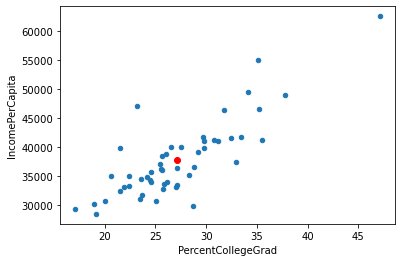

In [13]:
###
ax = s.plot.scatter(x='PercentCollegeGrad', y='IncomePerCapita')
plt.scatter(s.PercentCollegeGrad.mean(), s.IncomePerCapita.mean(), color='red')

In [14]:
s.PercentCollegeGrad.corr(s.IncomePerCapita)

0.8209551817784049

## Linear regression analyses

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/2560px-Linear_regression.svg.png" alt="Regression" width="300"/> 

* Regression is a form of supervised machine learning 
    * Model a linear relationship
    * Learn to predict outputs (y) given inputs (x...)
        * labeled data (y = labels)
    * https://en.wikipedia.org/wiki/Linear_regression
    
* Python:  scikit-learn library
    * `sklearn.linear_model.LinearRegression().fit(inputs, output)`
    * https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
    * https://realpython.com/linear-regression-in-python/


### Simple Linear Regression

![](https://cdn-images-1.medium.com/max/500/0*gglavDlTUWKn4Loe)

* Predict y given x
* $y = m*x + b$
* Find m,b that minimizes the Loss:
    * $residual_i = actual_i - predicted_i = y_i - (m*x_i + b)$
    * $Loss = \sum residual_i^2$
* Regression line plot
* Residual plot
    * https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/
* R-squared measure
    * Coefficient of determination: proportion of total variation explained by the model
    * $r^2 == 1$ means perfectly correlated results
    * $r(predicted, actual)^2$  -- see Pearson Correlation

How is IncomePerCapita linearly predicted by PercentCollegeGrad?

<AxesSubplot:xlabel='PercentCollegeGrad', ylabel='IncomePerCapita'>

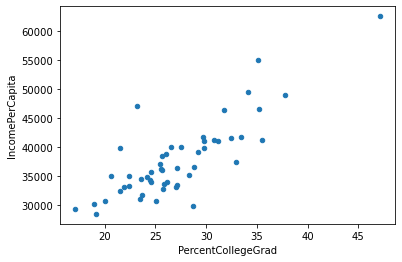

In [15]:
###
from sklearn.linear_model import LinearRegression
s.plot.scatter(x='PercentCollegeGrad', y='IncomePerCapita')

In [21]:
lm = LinearRegression().fit(s[['PercentCollegeGrad']], s.IncomePerCapita)
lm.coef_, lm.intercept_

(array([995.54255058]), 10791.531798151806)

In [23]:
s[s.Abbrev == 'VA']

,Name,Abbrev,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
46,Virginia,VA,8001024,7078515,41727,33.4,777,26.9,39490.09


In [25]:
33.4 * lm.coef_[0] + lm.intercept_

44042.65298742772

In [28]:
lm.predict([[33.4]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44042.65298743])

In [33]:
s['PredictedIPC'] = lm.predict(s[['PercentCollegeGrad']])

<AxesSubplot:xlabel='PercentCollegeGrad', ylabel='PredictedIPC'>

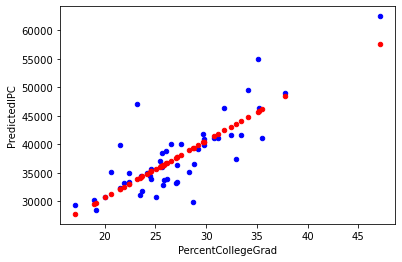

In [36]:
ax = s.plot.scatter(x='PercentCollegeGrad', 
                    y='IncomePerCapita', color='blue')
s.plot.scatter(x='PercentCollegeGrad', 
               y='PredictedIPC', ax=ax, color='red')

In [39]:
s['Residual'] = s.PredictedIPC - s.IncomePerCapita
(s.Residual**2).sum()

723001434.7839286

In [44]:
(s.IncomePerCapita.corr(s.PredictedIPC))**2

0.6739674104888136

In [43]:
lm.score(s[['PercentCollegeGrad']], s.IncomePerCapita)

0.6739674104888135

### Polynomial Regression

* Predict y given $x, x^2, x^3, ...$  (linear on these)
* $y = f(x) = c_0 + c_1 x + c_2 x^2 + ...$

How is IncomePerCapita **polynomially** predicted by PercentCollegeGrad?

Trick:  How is IncomePerCapita **linearly** predicted by PercentCollegeGrad and PercentCollegeGrad$^2$ and ...?

In [45]:
###
from sklearn.preprocessing import PolynomialFeatures

In [49]:
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(s[['PercentCollegeGrad']])
X

array([[  21.5 ,  462.25],
       [  26.5 ,  702.25],
       [  25.7 ,  660.49],
       [  18.9 ,  357.21],
       [  29.7 ,  882.09],
       [  35.5 , 1260.25],
       [  35.1 , 1232.01],
       [  27.5 ,  756.25],
       [  47.1 , 2218.41],
       [  25.6 ,  655.36],
       [  27.1 ,  734.41],
       [  29.2 ,  852.64],
       [  23.7 ,  561.69],
       [  29.8 ,  888.04],
       [  21.9 ,  479.61],
       [  24.2 ,  585.64],
       [  28.8 ,  829.44],
       [  20.  ,  400.  ],
       [  20.6 ,  424.36],
       [  26.1 ,  681.21],
       [  35.2 , 1239.04],
       [  37.8 , 1428.84],
       [  24.5 ,  600.25],
       [  31.2 ,  973.44],
       [  19.1 ,  364.81],
       [  24.6 ,  605.16],
       [  27.  ,  729.  ],
       [  27.1 ,  734.41],
       [  21.5 ,  462.25],
       [  32.4 , 1049.76],
       [  34.1 , 1162.81],
       [  25.1 ,  630.01],
       [  31.8 , 1011.24],
       [  25.8 ,  665.64],
       [  25.6 ,  655.36],
       [  23.6 ,  556.96],
       [  22.4 ,  501.76],
 

In [51]:
pm = LinearRegression().fit(X, s.IncomePerCapita)

In [53]:
s['PolyIPC'] = pm.predict(X)

<AxesSubplot:xlabel='PercentCollegeGrad', ylabel='PolyIPC'>

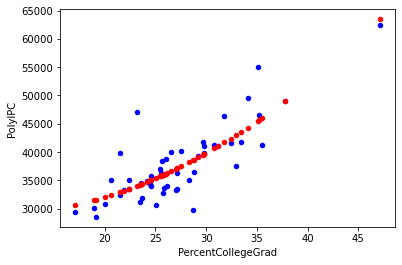

In [55]:
ax = s.plot.scatter(x='PercentCollegeGrad', 
                    y='IncomePerCapita', color='blue')
s.plot.scatter(x='PercentCollegeGrad', 
               y='PolyIPC', ax=ax, color='red')

In [56]:
pm.score(X, s.IncomePerCapita)

0.7030533652065534

### Multiple Linear Regression

* Predict y given x1, x2, x3, ...
* $y = m_1 x_1 + m_2 x_2 + ... + b$

How is IncomePerCapita linearly predicted by PercentCollegeGrad and MedianRent?

In [57]:
d = s[['PercentCollegeGrad', 'MedianRent']]

In [58]:
mm = LinearRegression().fit(d, s.IncomePerCapita)

In [60]:
mm.predict(d)
mm.score(d, s.IncomePerCapita)

0.6963076560360941